In [27]:
import os
import re
import h5py
import struct
import numpy as np
import configparser
import matplotlib.pyplot as plt
import plotly.express as px

from collections import defaultdict

In [2]:
config = configparser.ConfigParser()
config.read('file_paths.ini')
config.sections()

['MAIN_DATA_PATH', 'FY3', 'HIMAWARI']

In [3]:
H9_SST_DATA_LOCATION = config['HIMAWARI']['H9_SST_DATA_LOCATION']

In [4]:
h9_sst_data = [H9_SST_DATA_LOCATION + file_name for file_name in os.listdir(H9_SST_DATA_LOCATION)]

In [5]:
data = h5py.File('../China algs/data/mersi_l1/Y3E_08534_230226070855_7860R_MERSI_0250M_L1B_WITH_GEO.HDF')

In [6]:
data.keys()

<KeysViewHDF5 ['Calibration', 'Data', 'Geolocation', 'Latitude', 'Longitude', 'QA']>

In [13]:
plt.imsave('123.png', np.flipud(np.fliplr(np.array(data['Data']['EV_250_Emissive_b6']))))

In [7]:
lat_fy3 = np.flipud(np.fliplr(data['Latitude']))
lon_fy3 = np.flipud(np.fliplr(data['Longitude']))

In [8]:
data_h9 = h5py.File(h9_sst_data[1])

In [9]:
data_h9.keys()

<KeysViewHDF5 ['adi_dtime_from_sst', 'aerosol_dynamic_indicator', 'dt_analysis', 'l2p_flags', 'lat', 'lon', 'quality_level', 'satellite_zenith_angle', 'sea_ice_fraction', 'sea_ice_fraction_dtime_from_sst', 'sea_surface_temperature', 'solar_zenith_angle', 'sources_of_adi', 'sources_of_sea_ice_fraction', 'sources_of_wind_speed', 'sses_bias', 'sses_standard_deviation', 'sst_dtime', 'time', 'wind_speed', 'wind_speed_dtime_from_sst']>

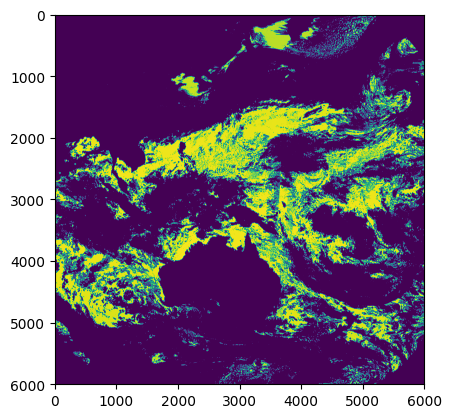

In [28]:
plt.imshow(np.array(data_h9['sea_surface_temperature'])[0])

In [10]:
lat_h9 = np.array(data_h9['lat'])
lon_h9 = np.array(data_h9['lon'])

In [11]:
lon = 143.26
lat = 52.3

In [44]:
left_top_lon = 139.78
left_top_lat = 54.36

left_bot_lon = 139.74
left_bot_lat = 49.7

right_top_lon = 145.8
right_top_lat = 54.26

right_bot_lon = 145.0
right_bot_lat = 50.56

square = {'left_top': (left_top_lon, left_top_lat),
          'left_bot': (left_bot_lon, left_bot_lat),
          'right_top': (right_top_lon, right_top_lat),
          'right_bot': (right_bot_lon, right_bot_lat)}

In [45]:
pix_h9 = defaultdict(list)

In [47]:
for key in square.keys():
    for i, deg_lat in enumerate(lat_h9):
        for j, deg_lon in enumerate(lon_h9):
            if (abs(deg_lat - square[key][1]) < 1e-4 * 4) and (abs(deg_lon - square[key][0]) < 1e-4 * 4):
                pix_h9[key].append((i, j))

KeyboardInterrupt: 

In [48]:
pix_h9

defaultdict(list,
            {'left_top': [(282, 2989)],
             'left_bot': [(515, 2987)],
             'right_top': [(287, 3290)],
             'right_bot': [(472, 3250)]})

In [19]:
pix_fy3 = {}

In [22]:
for i, scan_line in enumerate(np.dstack((lat_fy3, lon_fy3))):
    for j, (deg_lat, deg_lon) in enumerate(scan_line):
        if (abs(deg_lat - lat) < 1e-4 * 16) and (abs(deg_lon - lon) < 1e-4 * 16):
            pix_fy3[key].append((i, j))


In [23]:
pix_fy3

[(7324, 2764)]

In [13]:
data_fy3 = np.flipud(np.fliplr(np.array(data['Data']['EV_250_Emissive_b6'])))